In [1]:
import _pickle as cPickle

In [2]:
from flask import Flask, request
import pickle
import joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

In [4]:
#MACHINE LEARNING LIBRARIES
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv('transactions_train.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [6]:
df.shape

(6351193, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06
mean,2.425553e+02,1.798155e+05,8.347957e+05,8.561696e+05,1.101043e+06,1.225372e+06,1.215047e-03
std,1.410676e+02,6.036310e+05,2.889959e+06,2.926073e+06,3.398924e+06,3.674293e+06,3.483635e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.338829e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,7.486483e+04,1.415300e+04,0.000000e+00,1.330865e+05,2.149190e+05,0.000000e+00
75%,3.340000e+02,2.087152e+05,1.073460e+05,1.443651e+05,9.438661e+05,1.112791e+06,0.000000e+00
max,6.990000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [9]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [10]:
df.isFraud.value_counts()

0    6343476
1       7717
Name: isFraud, dtype: int64

In [11]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
6351186,699,CASH_OUT,62372.43,C1915659563,62372.43,0.0,C421781202,1195387.47,1257759.90,1
6351188,699,TRANSFER,162326.52,C1557504343,162326.52,0.0,C404511346,0.00,0.00,1
6351189,699,CASH_OUT,162326.52,C1532317723,162326.52,0.0,C446134087,0.00,162326.52,1
6351190,699,TRANSFER,2763398.31,C577803442,2763398.31,0.0,C619602282,0.00,0.00,1


In [12]:
df[df['isFraud']==0]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6351180,699,TRANSFER,549094.49,C519897821,0.0,0.00,C1595954485,628327.62,1177422.11,0
6351181,699,TRANSFER,125500.53,C1180820392,0.0,0.00,C733485865,174727.81,300228.35,0
6351184,699,PAYMENT,302.09,C1506297825,3691.0,3388.91,M276665299,0.00,0.00,0
6351187,699,PAYMENT,573.88,C1774322624,561.0,0.00,M358479392,0.00,0.00,0


In [13]:
df_newbalanceOrig_0 = df[df['newbalanceOrig']==0]
df_newbalanceOrig_0['isFraud'].value_counts()

0    3596103
1       7579
Name: isFraud, dtype: int64

In [14]:
df_newbalanceOrig = df[df['newbalanceOrig']>0]
df_newbalanceOrig['isFraud'].value_counts()

0    2747373
1        138
Name: isFraud, dtype: int64

In [15]:
trans_type = df['type'].value_counts().index[0:]

for i in trans_type:
    d_type = df[df['type']==i]
    print(i)
    print(d_type['isFraud'].value_counts(),"\n")

CASH_OUT
0    2229501
1       3868
Name: isFraud, dtype: int64 

PAYMENT
0    2147832
Name: isFraud, dtype: int64 

CASH_IN
0    1396865
Name: isFraud, dtype: int64 

TRANSFER
0    527968
1      3849
Name: isFraud, dtype: int64 

DEBIT
0    41310
Name: isFraud, dtype: int64 



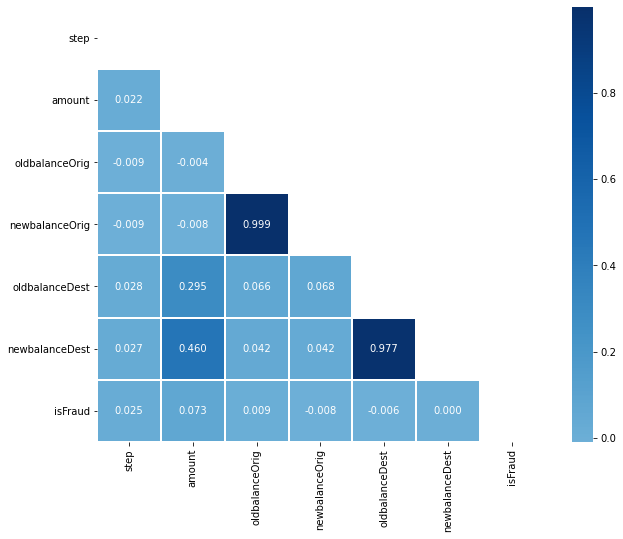

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df.corr(),annot=True, fmt='0.3f',center=0,linewidths=1,cmap="Blues", mask=mask)
plt.show()

In [17]:
X = df.drop(['isFraud'], axis = 1)
y = df['isFraud']
y.replace({1: True, 0: False}, inplace=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

#BUILD DECISION TREE CLASSIFIER

ohe = OneHotEncoder(sparse=False)
scaler = MinMaxScaler()
cls = DecisionTreeClassifier(random_state=123)

column_trans = make_column_transformer((scaler, ['step','amount','oldbalanceOrig', 'newbalanceOrig'
                                                ,'oldbalanceDest', 'newbalanceDest']),
                                               (ohe, ['type']), remainder='drop')
#column_drop = columnDropperTransformer(['nameOrig','nameDest'])

model = make_pipeline(column_trans, cls)

model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#DECISION TREE CLASSIFIER METRIC SCORES
print("Counfusion Matrix: \n",confusion_matrix (y_test, y_pred),"\n")
print("Classification Report: \n", classification_report (y_test, y_pred), "\n")
print("Accuracy Score: ", accuracy_score(y_test, y_pred), "\n")

Counfusion Matrix: 
 [[1268514     168]
 [    187    1370]] 

Classification Report: 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00   1268682
        True       0.89      0.88      0.89      1557

    accuracy                           1.00   1270239
   macro avg       0.95      0.94      0.94   1270239
weighted avg       1.00      1.00      1.00   1270239
 

Accuracy Score:  0.9997205250350525 



In [19]:
df_try = X_test.copy()
df_try['isFraud'] = np.array(y_test).reshape(-1,1)
display(df_try.reset_index(drop=True,inplace = True))
display(df_try[df_try['isFraud']==1])

try2pred = pd.DataFrame((np.array(df_try.iloc[1268706]).reshape(1,-1)),columns=df_try.columns.values)
display(try2pred)
model.predict(try2pred.drop(['isFraud'], axis=1))

None

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2481,302,TRANSFER,43235.71,C1028599135,43235.71,0.0,C1482390531,0.00,0.00,True
2893,156,CASH_OUT,134497.41,C1196634718,134497.41,0.0,C1667005815,16202218.65,16336716.06,True
2987,680,TRANSFER,272716.64,C1539029017,272716.64,0.0,C546068796,0.00,0.00,True
3929,282,CASH_OUT,8091.78,C1510812683,8091.78,0.0,C637384510,272960.57,281052.35,True
4183,577,TRANSFER,113687.00,C379022466,113687.00,0.0,C1223894198,0.00,0.00,True
...,...,...,...,...,...,...,...,...,...,...
1267943,266,CASH_OUT,1911239.21,C951381310,1911239.21,0.0,C1006459134,188720.75,2099959.96,True
1268706,237,TRANSFER,3924102.18,C344359156,3924102.18,0.0,C1708707330,0.00,0.00,True
1268798,581,TRANSFER,2562459.56,C2033083147,2562459.56,0.0,C320568622,0.00,0.00,True
1269662,415,CASH_OUT,191834.14,C728560783,191834.14,0.0,C662256008,105924.30,297758.43,True


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,237,TRANSFER,3924102.18,C344359156,3924102.18,0.0,C1708707330,0.0,0.0,True


array([ True])

In [20]:
pd.DataFrame(y_pred).value_counts()

False    1268701
True        1538
dtype: int64

In [21]:
print("Train Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:",model.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.9997205250350525


In [22]:
json_data = '{"step":1, "type":"PAYMENT", "amount":9839.64, "nameOrig":"C1231006815","oldbalanceOrig":170136.0, "newbalanceOrig":160296.36,"nameDest":"M1979787155","oldbalanceDest":0.0,"newbalanceDest":0.0}'

a_json = json.loads(json_data)
a_json
j = pd.DataFrame.from_dict(a_json, orient='index')
cols = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig', 'newbalanceOrig', 'nameDest','oldbalanceDest', 'newbalanceDest']
j = pd.DataFrame((np.array(j).reshape(1,-1)),columns=cols)
model.predict(j)

array([False])